## **Linear Regression with Python Scikit Learn**
**In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.**

### **Simple Linear Regression**
**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**

# <b> Author <span style='color:#0000FF'>|</span> Omar Mohamed Yehia Mohamed </b>

### <b> 1 <span style='color:#0000FF'>|</span> Importing libraries</b>


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


**Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.**

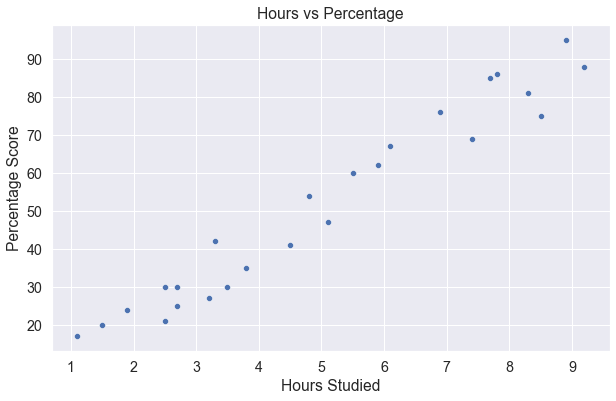

In [8]:
sns.scatterplot(data=df , x= 'Hours' , y='Scores')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### <b>2 <span style='color:#0000FF'>|</span> Split Dataset for Training and Testing </b>

In [18]:
feature  = df.iloc[:, :-1].values 
target = df.iloc[:, 1].values 

In [28]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(feature, target ,test_size=0.2, random_state=22) 

In [29]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (20, 1)
Shape of testing feature: (5, 1)
Shape of training label: (20,)
Shape of training label: (5,)


# <b> 3 <span style='color:#0000FF'>|</span> Modeling </b>

#### **Training the Algorithm**


In [30]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

# Finding accurcy of model 
print(f'Testing Accuracy: {r2_score(y_test, y_pred)}')


Testing Accuracy: 0.9291596273649902


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> Plotting the regression line with data  </b></p>
</div>

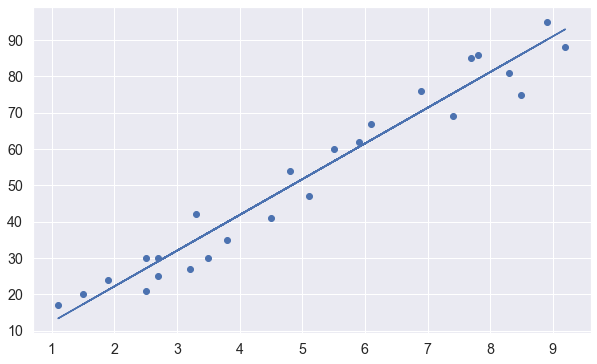

In [31]:
line = model.coef_*feature + model.intercept_

# Plotting for the test data
plt.scatter(feature,target)
plt.plot(feature, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [33]:
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test) # Predicting the scores

[[7.4]
 [6.1]
 [5.1]
 [2.7]
 [2.5]]


In [34]:
# Comparing Actual vs Predicted
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_new 

,Actual,Predicted
0,69,75.306438
1,67,62.526494
2,47,52.695768
3,25,29.102026
4,30,27.135881


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> what will be predicted score if a student studies for 9.25 hrs/day ?  </b></p>
</div>. 

In [53]:
hours = 9.25
prediction = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.49328112502093


# <b> 4 <span style='color:#0000FF'>|</span> Evaluating the mode </b>

**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.**

In [56]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error   
print('Score:',r2_score(y_test, y_pred)) 
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))

Score: 0.9291596273649902
Mean Absolute Error: 4.6883714354805734
Mean Squared Error: 23.450996957093636
